# Ice Games Project.

## Introduction.

Today, the video game industry is a constantly evolving sector, characterized by its competitiveness and the need to understand consumer preferences. This project focuses on the online store Ice, which specializes in selling video games worldwide. <br> <br>With historical data since 2016, the project seeks to identify patterns that determine the success or failure of video games, leveraging user and expert reviews, genres, platforms, and sales. The ability to analyze this data will allow Ice to plan effective advertising campaigns and identify promising projects for 2017 and beyond. <br> <br> The information to be worked with is a dataset, the details of which are: <br> — Name <br>
— Platform <br>
— Year_of_Release <br>
— Genre <br>
— NA_sales (North American sales in millions of US dollars) <br>
— EU_sales (European sales in millions of US dollars) <br>
— JP_sales (Japanese sales in millions of US dollars) <br>
— Other_sales (sales in other countries in millions of US dollars) <br>
— Critic_Score (maximum of 100) <br>
— User_Score (maximum of 10) <br>
— Rating (ESRB) <br>

## Objectives.

The primary objective of this project is to analyze a video game dataset to identify the factors that contribute to its commercial success. This includes exploring sales by platform and genre, evaluating the influence of ratings on sales, and creating user profiles for different regions. At the end of the analysis, the goal is to provide informed recommendations to guide Ice's strategic marketing decisions.

## Action Plan.

To achieve the stated objectives, the project will be developed in several stages:

**Data Exploration:** Load and examine the dataset, verifying its structure and data quality. <br><br>

**Data Preparation:** Clean and transform the data, including renaming columns, handling missing values, and converting data types as needed. <br><br>

**Descriptive Analysis:** Investigate sales trends by year, platform, and genre. This will include identifying popular platforms and their evolution over time.<br><br>

**Data Visualization:** Create graphs and charts showing the relationship between different variables, such as global sales and reviews, as well as game distribution by genre.<br><br>

**User Profile:** Develop a profile for each region by analyzing the most popular platforms and genres, as well as the impact of ESRB ratings.<br><br>

**Hypothesis Testing:** Formulate and test hypotheses about platform and genre ratings, using appropriate statistical methods.<br><br>

**Conclusions and Recommendations:** Summarize the analysis findings, discuss their relevance, and offer strategic recommendations for future advertising campaigns.<br><br>

By completing these steps, you will not only gain experience in data management but also add value to Ice Store's commercial strategy in the competitive video game market.<br><br>

## Development.

### Import libraries.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import statistics as stat

### Data load.

In [ ]:
df= pd.read_csv("/Users/pauli/Documents/Data/ice_games/games.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
# Print a sample of the data

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


The data show missing values ​​in almost all columns, except for sales for each region. These missing data will be analyzed and addressed in the next step of development. For ease of work and presentation, all column names will be in lowercase.

### Data prep

In [ ]:
# Convert column names to lowercase.
new_names=[]
for old_name in df.columns:
    lower= old_name.lower()
    new_names.append(lower)
    
df.columns= new_names
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
# Change the data types of columns.

df['year_of_release']= df['year_of_release'].astype('Int64')

The release year was changed to whole numbers as they were displayed as decimals, when there was no need for them since they were years.

In [6]:
df['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

There is a non-numeric value, 'tbd', which means that these are values ​​that have not yet been defined, so it will be replaced as a nan so that all data can be treated equally as missing and the data type can be changed.

In [7]:
df['user_score']= df['user_score'].replace('tbd', np.nan)

df['user_score']= df['user_score'].astype('float')

The user score data type must be changed to a floating point number, as the score is a numeric data type with decimals. This is important so that numerical calculations, comparisons, and corresponding graphs can be performed later without generating errors due to the data type.

In [ ]:
# Check if there are duplicate values.

df.duplicated()

NameError: name 'df' is not defined

No hay filas duplicadas en el dataframe. 

In [ ]:
#Check for missing values.
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
#Check for missing values ​​by column.

df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The only two missing values ​​in name are also missing values ​​in genre, so both can be resolved simultaneously. The reason for these missing values ​​could be the release year, a loss of information for those specific games, and it's difficult to recover due to the age of the data. In this case, they will be removed from the DF, as there are several missing values ​​in the row. Having data for a game without a name isn't useful, since the analysis we want to perform involves sales by game and the evolution of each one over time.

In [ ]:
#Delete missing name data

df= df.dropna(subset=['name'])

#Check that they are no longer there

df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [ ]:
# Fill NaNs
med_user= df['user_score'].median()
df['user_score'].fillna(med_user, inplace= True)

med_critic= df['critic_score'].median()
df['critic_score'].fillna(med_critic, inplace= True)

df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

In [ ]:
#Analysis of missing data in critical score and user score.
df.groupby('year_of_release').agg(
    games=('name', 'count'), 
    user= ('user_score', 'count'), 
    critic= ('critic_score', 'count'))

#A grouping was made by year showing how many games were released for that year, how many user and critic ratings there were.

,games,user,critic
year_of_release,,,
1980,9,9,9
1981,46,46,46
1982,36,36,36
1983,17,17,17
1984,14,14,14
1985,14,14,14
1986,21,21,21
1987,16,16,16
1988,15,15,15


Analyzing the missing values ​​for both the user ratings and the reviews, it can be seen that the vast majority are from many years ago, from 1995 onwards, and although there is still missing data in future years, we can work with the data that is available. Since this is an analysis that has to do with the marketing area, we can conclude that data from such previous years does not affect the present analysis and the decision is made to leave the missing data untreated, and not replace it with some other value such as '0' so as not to affect the analysis of the graphs and there is an erroneous bias. <br><br> Regarding the release year, these values ​​​​cannot be replaced with an average or some other information, since they are exact data that when altered can affect the veracity of the analysis, so the decision is also made to leave the missing data untreated.

In [ ]:
# Add up the sales and create a new column with the total sales.

df['total_sales']= df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38


### Data Analysis.

**How many games were released in different years? Is the data for each period significant?**

<AxesSubplot:xlabel='year_of_release'>

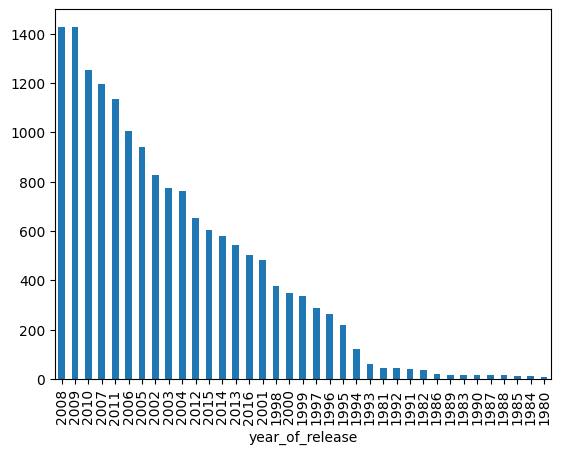

In [ ]:
#Group data by release year and filter by name

df.groupby('year_of_release')['name'].count().sort_values(ascending= False).plot(kind='bar')

Truly representative sales data can be found from 1998 onwards, with sales ranging from approximately 400 to 1.4 billion.

**How do sales vary from one platform to another?**

<AxesSubplot:xlabel='platform'>

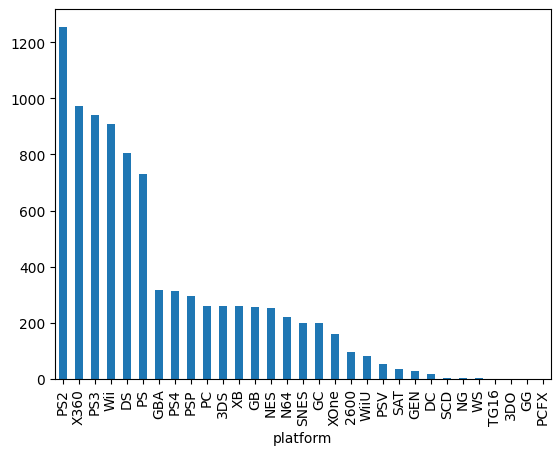

In [ ]:
#Group data by platform and filter by total sales.

df.groupby('platform')['total_sales'].sum().sort_values(ascending= False).plot(kind='bar')

The platforms that sell the most video games are PS, DS, Wii, PS3, X360 and PS2, with the PS2 having the highest sales volume and the rest having behaved similarly.

**Choose the platforms with the highest total sales and build a distribution based on each year's data. Look for platforms that used to be popular but are now losing sales. How long does it typically take for new platforms to appear and old ones to disappear?**

In [ ]:
#Create a list of the best-selling platforms
plataformas= ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'] 

#Filter the df to consider only the selected platforms, group by release year and platform, and add up the total sales for that grouping.
years_platform= df[df['platform'].isin(plataformas)].groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

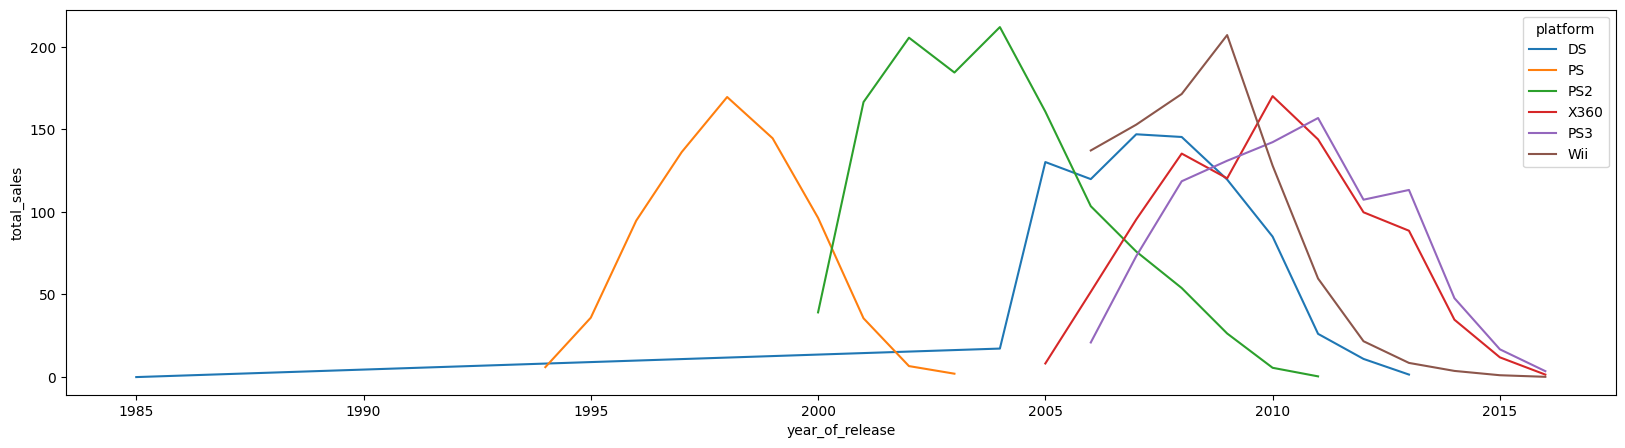

In [ ]:
#Life cycle chart
plt.figure(figsize= (20,5))
sns.lineplot(data= years_platform, x= 'year_of_release', y= 'total_sales', hue= 'platform')

In [ ]:
#Calculate the life cycle

cycle= df[df['platform'].isin(plataformas)].groupby('platform').agg(
    first_year= ('year_of_release', 'min'),
    last_year= ('year_of_release', 'max'))

cycle

,first_year,last_year
platform,,
DS,1985,2013
PS,1994,2003
PS2,2000,2011
PS3,2006,2016
Wii,2006,2016
X360,2005,2016


Analyzing the data, we can conclude that between 1995 and 2000, the original PS dominated the market completely, between 2000 and 2005, the PS2 was at its peak, and between 2005 and 2010, there was competition between the Wii, PS3, and Xbox 360. Life cycles tend to last approximately 5-7 years, with newer consoles showing less pronounced but more sustained sales peaks. Finally, we note a clear pattern of overlap between console generations.

**Taking this information into account, we decided to work with the most recent 6 years of data, starting in 2011.**


In [ ]:
# Filter the dataframe to account for data from 2011 onwards.

df_filter= df[df['year_of_release']>2010]
df_filter.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,71.0,7.5,NaN,14.60


**With the leaked data, which platforms are leading in sales? Which ones are growing and which ones are declining? Which platforms are potentially profitable?**

<AxesSubplot:xlabel='platform'>

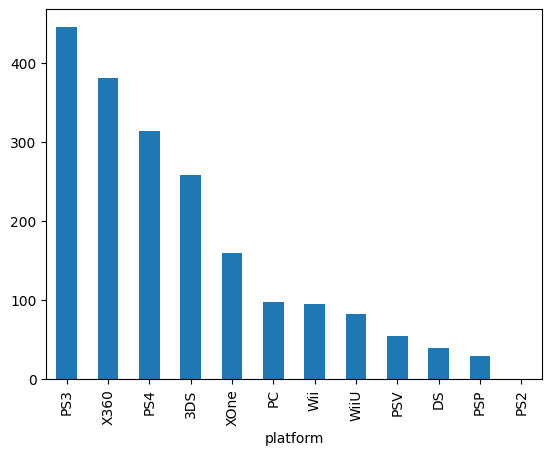

In [21]:
df_filter.groupby('platform')['total_sales'].sum().sort_values(ascending= False).plot(kind='bar')

In the last six years, the three best-selling platforms have been the PS3, the Xbox 360, and the PS4. Although the PS3 currently outsells the PS4, the PS4 is considered to have significant potential as it's newer to the market, and it may be a matter of time before it matches or surpasses the PS3. Another console with significant potential is the Xbox One, which was only released in 2013, and based on the average life cycle analysis above, it may be entering its peak.

The platforms that have been declining in recent years are the Wii, PSV, DS, PSP, and PS2.

I wouldn't consider the PC to be in decline as it's still a popular tool. It's just not the primary source of video game sales, but it doesn't represent great potential or even the majority of sales either. It's a relatively secure source of revenue, but with low sales compared to consoles.

**Box plot for global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales across platforms?**

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

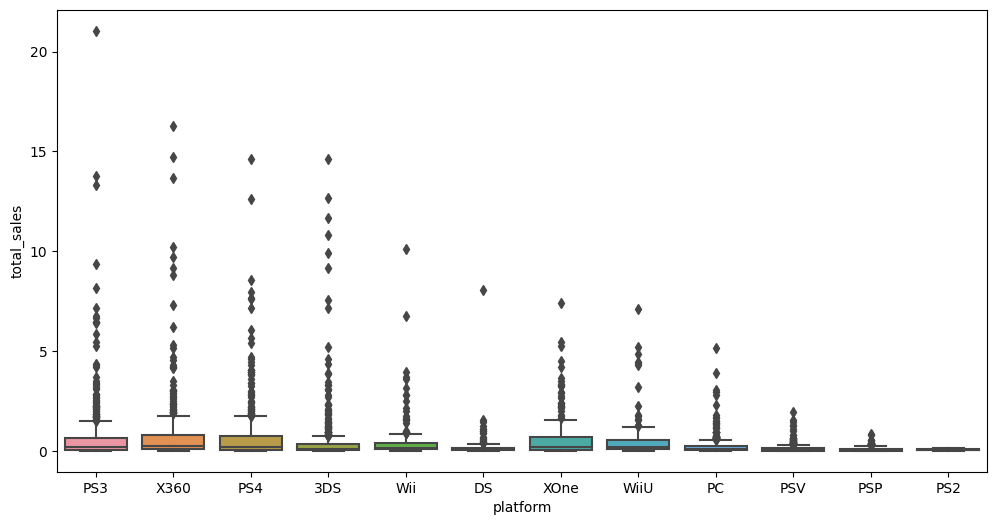

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_filter)

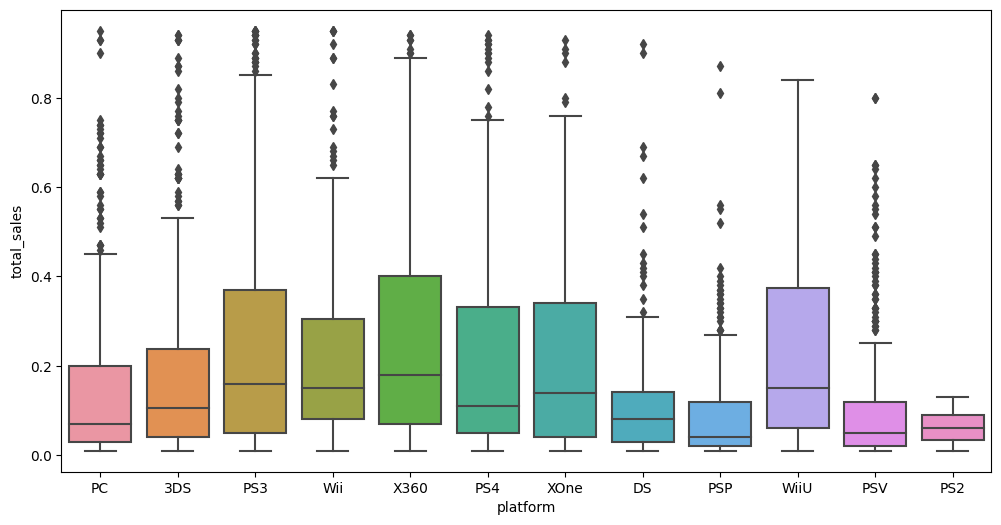

In [ ]:
# Calculate the quartiles and IQR of the total_sales column
Q1 = df_filter['total_sales'].quantile(0.25)
Q3 = df_filter['total_sales'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to detect outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#Filter data without outliers
df_new = df_filter[(df_filter['total_sales'] >= limite_inferior) & (df_filter['total_sales'] <= limite_superior)]

# Redraw the boxplot without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_new)
plt.show()

After removing the most significant outliers, it can be seen that the PS4, PS3, and XOne platforms have a higher median, indicating that they have higher total sales compared to other platforms such as the PS2 and DS, which show much lower sales. The PS2 and PSV have both median and peak values ​​that are significantly lower compared to the other platforms.

Platforms that show a higher number of outliers could be of interest for further studies on what factors contribute to these sales spikes.

**How ​​do user and professional reviews affect PS3 sales?**

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

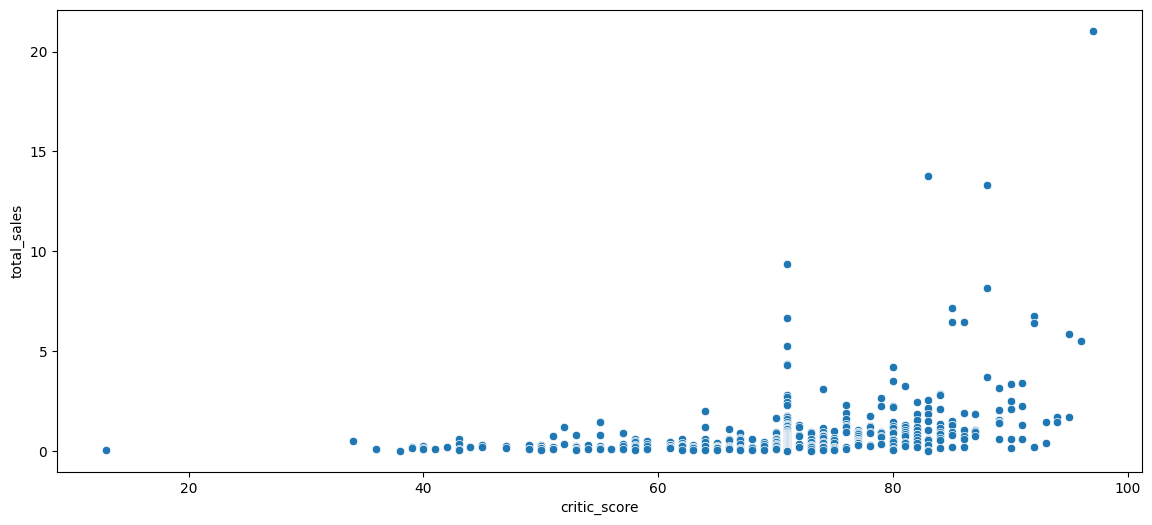

In [ ]:
#Filter the dataset to have data only from the PS3.
ps3= df_filter[df_filter['platform']== 'PS3']

#Create a scatter plot for each review type.

#Critic Score 
plt.figure(figsize=(14, 6))
sns.scatterplot(x='critic_score', y='total_sales', data= ps3)


**Critic Score**: From this relationship, we can see a slight positive trend: as the critical score increases, sales also increase somewhat. Most PS3 game sales are centered between 0 and 5 million, regardless of the critical score. The dispersion of the data increases noticeably in the high critical score region, suggesting that good reviews do not guarantee high sales, although they do increase the likelihood of achieving them.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

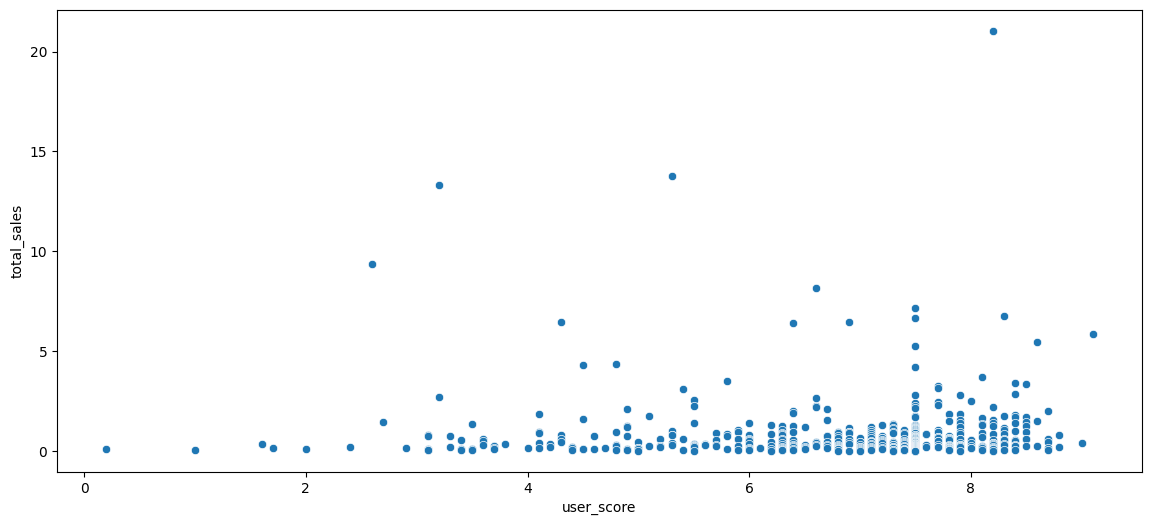

In [24]:
#User Score 

plt.figure(figsize=(14, 6))
sns.scatterplot(x='user_score', y='total_sales', data= ps3)


As with the critical score, there is an upward trend, although it is not a completely linear relationship. A notable difference is that high sales, or sales outside the majority threshold, are observed even when the user score is relatively low; this behavior is not reflected in the critical score. Therefore, one could conclude that the user score has less of an impact on sales than the critical score, at least in the case of the PS3. In both cases, although a higher user score can contribute to higher sales, it is not an absolute determining factor.

**Regarding the overall distribution of games by genre, what can be said about the most profitable genres? Can we generalize about genres with high and low sales?**

<AxesSubplot:xlabel='genre'>

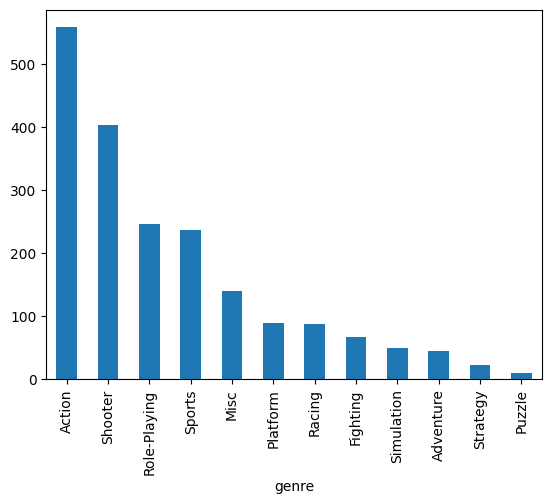

In [ ]:
#Group the dataset by gender and display sales.
df_filter.groupby('genre')['total_sales'].sum().sort_values(ascending= False).plot(kind='bar')

In general, action and shooter genres are the most profitable due to their high sales, while genres like strategy and puzzle are less in-demand and therefore generate less revenue.
Analyzing this, a pattern can be identified in the two best-selling genres, action and shooter. Both are fast-paced games with typically very dynamic visuals, and on some level, shooters could be classified as a subgenre of action.

The lowest-selling genres, like adventure, strategy, and puzzle, are fairly calm and, one might say, slow or relaxing.

### Analyze data by region.

<AxesSubplot:xlabel='platform'>

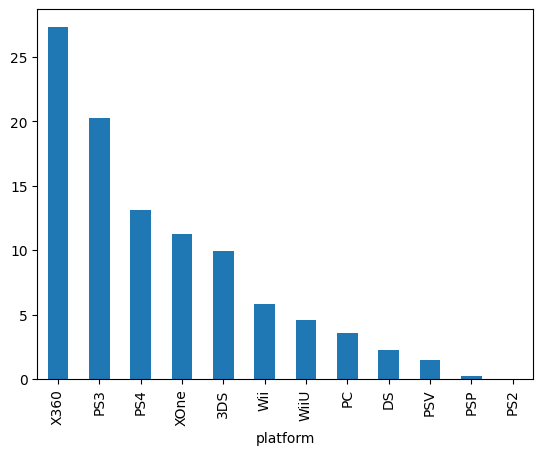

In [ ]:
# Filter the dataset by region and display the percentage that each platform represents of sales.

#United States

us_sales= df_filter['na_sales'].sum()

us_filter= df_filter.groupby(['platform'])['na_sales'].sum().sort_values(ascending= False)

us_total= us_filter*100/us_sales

us_total.plot(kind='bar')

<AxesSubplot:xlabel='platform'>

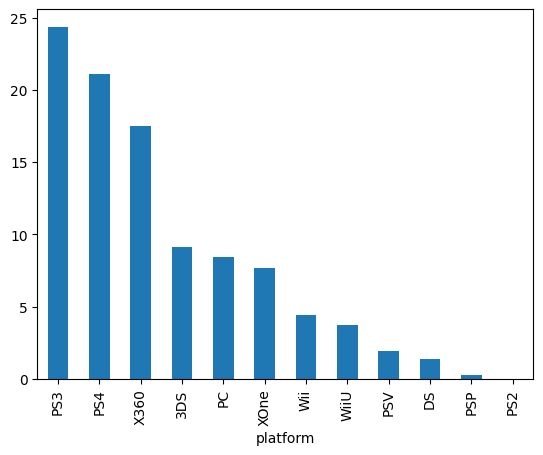

In [ ]:
#Europe

ue_sales= df_filter['eu_sales'].sum()

ue_filter= df_filter.groupby(['platform'])['eu_sales'].sum().sort_values(ascending= False)

ue_total= ue_filter*100/ue_sales

ue_total.plot(kind='bar')

<AxesSubplot:xlabel='platform'>

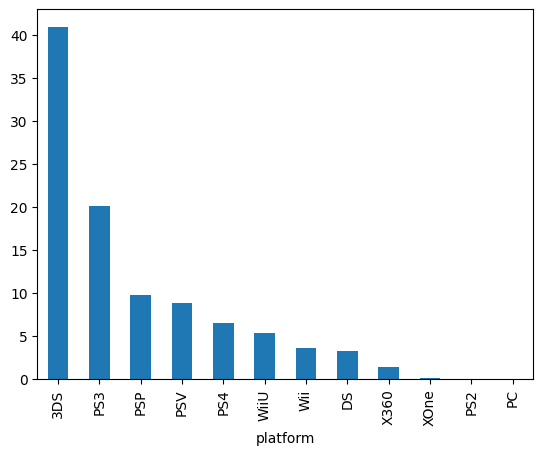

In [ ]:
#Japan
jp_sales= df_filter['jp_sales'].sum()

jp_filter= df_filter.groupby(['platform'])['jp_sales'].sum().sort_values(ascending= False)

jp_total= jp_filter*100/jp_sales

jp_total.plot(kind='bar')

**Market Share Analysis**:
In the United States, the Xbox 360 and PlayStation 3 dominate the market, with the Xbox 360 in first place, followed by the PS3 with only a 5-point difference, and the PS4 in third place. One possible reason for this could be that the Xbox 360 is American-made (Microsoft) and was promoted with exclusive market knowledge.

In Europe, the PS3 and PS4 lead the market with very little difference between them, with the Xbox 360 in third place. This shows the cultural difference and how a good analysis and marketing campaign can affect preferences. It would even be necessary to analyze the possible language barriers that the Xbox 360 franchises may have in Europe.

In Japan, the Nintendo 3DS leads the market by a wide margin, accounting for almost half of sales, followed by the PS3 and PSP. We note that Japan has a notable preference for handheld consoles, and Nintendo is a Japanese brand with a long tradition in the local market. Xbox's low popularity in Japan may be due to the lack of games geared toward Japanese audiences and strong competition from local brands like Nintendo and Sony, which better understand the tastes and preferences of Japanese gamers.

**Gender analysis by region**

<AxesSubplot:xlabel='genre'>

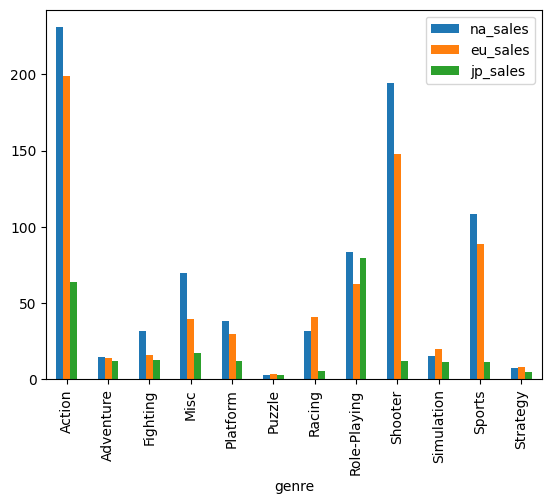

In [ ]:
# Filter the dataset by region and analyze the main genres in each.

#United States

df_filter.groupby(['genre']).sum()[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar')

In both the United States and Europe, action and shooting games account for the vast majority of the market, which is consistent with the previous analysis of genres. Sports and role-playing games would follow in order, however, it's worth noting that in Japan, role-playing games outnumber action games.
The remaining categories are not as representative by region, although it would be interesting to analyze Misc and see how to categorize these games, as they have a high sales value.

**Do ESRB ratings affect sales in individual regions?**

<AxesSubplot:xlabel='rating'>

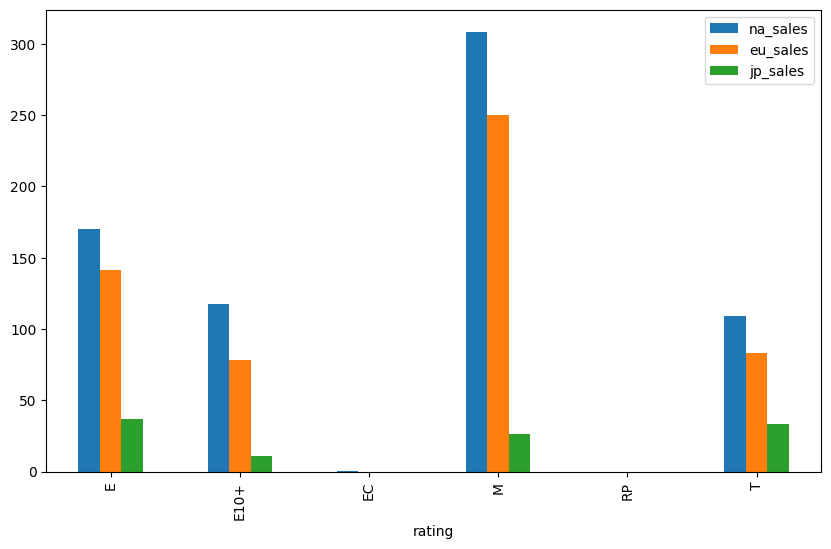

In [30]:
esrb_sales = df_filter.groupby(['rating']).sum()[['na_sales', 'eu_sales', 'jp_sales']]

esrb_sales.plot(kind='bar', figsize=(10, 6))

To understand the analysis, let's start by defining the meaning of each classification. <br>
E: Everyone <br>
E10+: Everyone ages 10 and up. <br>
EC: All children ages 3 and up. <br>
M: Adults. <br>
RP: Classification pending. <br>
T: Teens. <br>

Knowing this, we can see that games suitable for everyone generally have a good sales level in all regions. However, in Europe and the United States, they are not the highest, but neither are they the lowest. In Japan, however, it is the best-selling genre, followed by teens. Therefore, we could say that the games sold in Japan are mostly suitable for families, with a high tendency to be used by teens.

In the case of Europe and the United States, the best-selling classification is adult, with a significant difference from the other categories, which makes perfect sense considering that the best-selling genre in this region is action.

For E10+, it represents a portion of sales in all regions, with a downward trend compared to the other countries. And the CE classification and those not yet classified do not represent a significant percentage of sales in all regions.

Ultimately, classifications do affect sales.

### Hypothesis Testing.

**Null Hypothesis 1**:<br>
The average user ratings for the Xbox One and PC platforms are the same.<br>
**Alternative Hypothesis 1**: <br>
The average user ratings for the Xbox One and PC platforms are different.<br>
**Alpha**: 5%

In [ ]:
# Filter the information to obtain ratings by platform

score_xone= df_new[df_new['platform']=='XOne']['user_score'].dropna()

score_pc= df_new[df_new['platform']=='PC']['user_score'].dropna()

#Levene Test: 

p_levene = st.levene(score_xone, score_pc)
print("Levene's test for equality of variances:")
print("p-value:", p_levene.pvalue)

#T-Test: 

alpha= 0.05
prueba_t= st.ttest_ind(score_xone, score_pc, equal_var= False)
print ("p-value prueba t:", prueba_t.pvalue)
if prueba_t.pvalue < alpha:
    print("We reject the null hypothesis: Average user ratings for Xbox One and PC are different.")
else:
    print("The null hypothesis cannot be rejected: There is insufficient evidence to suggest that the mean grades are different.")

Prueba de Levene para igualdad de varianzas:
p-value: 0.040471952468216915
p-value prueba t: 0.2613799587621924
No se puede rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.


Since we want to verify that the average user ratings for Xone and PC are the same, we first pose this option as the null hypothesis, since we must always seek equality. Then we perform the Levene test, which helps us determine whether the variances are equal or different. This is important since the test we are going to perform to test our hypothesis assumes that both variables have the same variance. If they do not, we must inform the user so that the calculations can be performed correctly.

Then we proceed to perform the test, indicating the previous result, that is, that the variances are different. This test gives us a probability value above the significance level, so we cannot reject the null hypothesis. 

**Null Hypothesis 2**:<br>
The average user ratings for the Action and Sports genres are the same.<br>
**Alternative Hypothesis 2**: <br>
The average user ratings for the Action and Sports genres are different.<br>
**Alpha**: 5%

In [ ]:
score_action= df_new[df_new['genre']=='Action']['user_score'].dropna()

score_sports= df_new[df_new['genre']=='Sports']['user_score'].dropna()

#Prueba de Levene: 

p_levene = st.levene(score_action, score_sports)
print("Levene's test for equality of variances:")
print("p-value:", p_levene.pvalue)

#Prueba T: 

alpha= 0.05
prueba_t= st.ttest_ind(score_action, score_sports)
print ("p-value prueba t:", prueba_t.pvalue)
if prueba_t.pvalue < alpha:
    print("We reject the null hypothesis: Average user ratings for Action and Sports are different.")
else:
    print("The null hypothesis cannot be rejected: There is insufficient evidence to suggest that the mean grades are different.")

Prueba de Levene para igualdad de varianzas:
p-value: 4.493928049792339e-17
p-value prueba t: 3.4203368340451813e-20
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Acción y Deportes son difrentes.


In this case, the hypothesis to be tested was "The average user ratings for the Action and Sports genres are different." Therefore, we established equality as the null hypothesis.
Levene's test was well above 0.05, so it can be assumed that the variances are homogeneous. There's no need to change the equal_var, which defaults to True.

Finally, the null hypothesis is rejected because the p value is greater than the given alpha value.


## Conclusions 

We can conclude that the leading platforms in sales over the last six years have been PS3, Xbox 360, and PS4. Although PS3 remains ahead of PS4, the latter shows great potential due to its newer nature and could match or surpass PS3 in the future. Xbox One, launched in 2013, also has a favorable life cycle and could be entering its strongest growth phase. On the other hand, consoles such as Wii, PSV, DS, PSP, and PS2 are in decline, indicating that they are not a strong bet for future campaigns. The PC, while not a standout in sales, is a relatively stable source of revenue, albeit with limited potential compared to consoles. <br>

The analysis shows that while good game reviews (critic scores) can increase sales, they do not always guarantee commercial success. PS3 games, for example, typically sell between 0 and 5 million units regardless of their critical score, and while games with high scores have a greater sales dispersion, this indicates that other factors (such as the popularity of the franchise or the platform) are equally or more important. <br>

For 2017 marketing campaigns, it is recommended to prioritize PS4 and Xbox One, as both platforms show high growth potential due to their recent launch and favorable life cycle. In the United States, where Xbox 360 and PS3 dominate, it would be strategic to leverage local affinity for Xbox and PS3 loyalty by promoting PS4 and Xbox One releases to stimulate a shift to the newer consoles. In Europe, where PS3 and PS4 lead the market, it would be wise to maintain the strong PlayStation brand presence while expanding PS4 releases. In Japan, it's key to focus on handheld consoles like the Nintendo 3DS and games that cater to the preference for family and role-playing games, given the dominance of Nintendo and Sony in the region. <br>

In terms of genres, action and shooter games, which lead sales in the United States and Europe, should be the focus of campaigns in these regions, while in Japan, it's key to give more visibility to role-playing games, which are more popular there. Age ratings also influence sales: in Japan, family and teen games are more popular, while in Europe and the United States, adult games dominate, aligned with the preference for action genres. Considering these cultural and rating differences when designing campaigns can maximize the impact of launches in each market.
